In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=877d9a55f329184f21c04abe0f5cbda78c7736bb70bcd76d540fbac0aec72d7c
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [4]:
import pandas as pd
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
data=pd.read_csv('/content/chatgpt_style_reviews_dataset.xlsx - Sheet1.csv')

In [7]:
data.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [11]:
for i in data.select_dtypes(include=['object']):
    data[i]=data[i].str.lower()

In [12]:
data

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no
1,3/7/2025,growth pretty wish.,ask develop bag also his worker pass. expert w...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes
2,########,what then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,flipkart,es,kuwait,3.6.5,no
3,########,say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,amazon,pt,uruguay,5.7.2,no
4,########,purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,amazon,zh,mayotte,5.8.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,father who tax.,government card history suddenly save theory s...,5,amassey,109,22,app store,en,micronesia,2.3.4,yes
246,########,remain movement bit step direction give reduce.,court control million hundred offer total hit ...,5,stevenandrews,26,23,website,fr,austria,3.5.3,no
247,########,form now then watch certain.,just opportunity ask yet against large practic...,1,michelle90,67,24,app store,ru,rwanda,3.9.6,no
248,3/7/2024,recent catch gas benefit great religious.,onto simple audience as including claim create...,5,victor24,29,19,amazon,zh,iran,4.9.2,no


In [13]:
#def r_w(text):
 # return " ".join(text.split())
#data['review']=data['review'].apply(r_w)

In [14]:
data

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no
1,3/7/2025,growth pretty wish.,ask develop bag also his worker pass. expert w...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes
2,########,what then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,flipkart,es,kuwait,3.6.5,no
3,########,say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,amazon,pt,uruguay,5.7.2,no
4,########,purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,amazon,zh,mayotte,5.8.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,father who tax.,government card history suddenly save theory s...,5,amassey,109,22,app store,en,micronesia,2.3.4,yes
246,########,remain movement bit step direction give reduce.,court control million hundred offer total hit ...,5,stevenandrews,26,23,website,fr,austria,3.5.3,no
247,########,form now then watch certain.,just opportunity ask yet against large practic...,1,michelle90,67,24,app store,ru,rwanda,3.9.6,no
248,3/7/2024,recent catch gas benefit great religious.,onto simple audience as including claim create...,5,victor24,29,19,amazon,zh,iran,4.9.2,no


In [15]:
def L_D(text):
  try:
    return detect(text)
  except LangDetectException:
    return unknown
data['detect_language']=data['review'].apply(L_D)

In [16]:
data=data[data['detect_language']=='en']
print(data['detect_language'].value_counts())

detect_language
en    250
Name: count, dtype: int64


In [17]:
data

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language
0,2024-09-06,claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no,en
1,3/7/2025,growth pretty wish.,ask develop bag also his worker pass. expert w...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes,en
2,########,what then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,flipkart,es,kuwait,3.6.5,no,en
3,########,say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,amazon,pt,uruguay,5.7.2,no,en
4,########,purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,amazon,zh,mayotte,5.8.6,no,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,father who tax.,government card history suddenly save theory s...,5,amassey,109,22,app store,en,micronesia,2.3.4,yes,en
246,########,remain movement bit step direction give reduce.,court control million hundred offer total hit ...,5,stevenandrews,26,23,website,fr,austria,3.5.3,no,en
247,########,form now then watch certain.,just opportunity ask yet against large practic...,1,michelle90,67,24,app store,ru,rwanda,3.9.6,no,en
248,3/7/2024,recent catch gas benefit great religious.,onto simple audience as including claim create...,5,victor24,29,19,amazon,zh,iran,4.9.2,no,en


In [18]:
def a_c(text):
  data['review']= re.sub(r'[^a-zA-Z\s]','',text)
  return text
data['review']=data['review'].apply(a_c)

In [19]:
data

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language
0,2024-09-06,claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no,en
1,3/7/2025,growth pretty wish.,ask develop bag also his worker pass. expert w...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes,en
2,########,what then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,flipkart,es,kuwait,3.6.5,no,en
3,########,say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,amazon,pt,uruguay,5.7.2,no,en
4,########,purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,amazon,zh,mayotte,5.8.6,no,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,father who tax.,government card history suddenly save theory s...,5,amassey,109,22,app store,en,micronesia,2.3.4,yes,en
246,########,remain movement bit step direction give reduce.,court control million hundred offer total hit ...,5,stevenandrews,26,23,website,fr,austria,3.5.3,no,en
247,########,form now then watch certain.,just opportunity ask yet against large practic...,1,michelle90,67,24,app store,ru,rwanda,3.9.6,no,en
248,3/7/2024,recent catch gas benefit great religious.,onto simple audience as including claim create...,5,victor24,29,19,amazon,zh,iran,4.9.2,no,en


In [20]:
def s_p(text):
  doc = nlp(text)
  tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(tokens)
data['review']=data['review'].apply(s_p)
data['review']

,review
0,sense include lot effect fill general relation...
1,ask develop bag worker pass expert white arm s...
2,customer address region try near risk girl spr...
3,television loss election small detail red son ...
4,pass share lot manage world worker exactly dev...
...,...
245,government card history suddenly save theory p...
246,court control million offer total hit end hair...
247,opportunity ask large practice time live relat...
248,simple audience include claim create woman sim...


In [21]:
data['review']=data['review'].str.replace(r'\s*\n\s*',' ',regex=True)
data['review']

,review
0,sense include lot effect fill general relation...
1,ask develop bag worker pass expert white arm s...
2,customer address region try near risk girl spr...
3,television loss election small detail red son ...
4,pass share lot manage world worker exactly dev...
...,...
245,government card history suddenly save theory p...
246,court control million offer total hit end hair...
247,opportunity ask large practice time live relat...
248,simple audience include claim create woman sim...


In [22]:
data

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language
0,2024-09-06,claim who accept.,sense include lot effect fill general relation...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no,en
1,3/7/2025,growth pretty wish.,ask develop bag worker pass expert white arm s...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes,en
2,########,what then spend offer reason whom none.,customer address region try near risk girl spr...,5,katherineali,130,21,flipkart,es,kuwait,3.6.5,no,en
3,########,say dog drug enter director strong student.,television loss election small detail red son ...,1,eric11,72,26,amazon,pt,uruguay,5.7.2,no,en
4,########,purpose here beyond.,pass share lot manage world worker exactly dev...,5,chloe42,123,27,amazon,zh,mayotte,5.8.6,no,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,father who tax.,government card history suddenly save theory p...,5,amassey,109,22,app store,en,micronesia,2.3.4,yes,en
246,########,remain movement bit step direction give reduce.,court control million offer total hit end hair...,5,stevenandrews,26,23,website,fr,austria,3.5.3,no,en
247,########,form now then watch certain.,opportunity ask large practice time live relat...,1,michelle90,67,24,app store,ru,rwanda,3.9.6,no,en
248,3/7/2024,recent catch gas benefit great religious.,simple audience include claim create woman sim...,5,victor24,29,19,amazon,zh,iran,4.9.2,no,en


/tmp/ipython-input-128944031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', palette='coolwarm' )


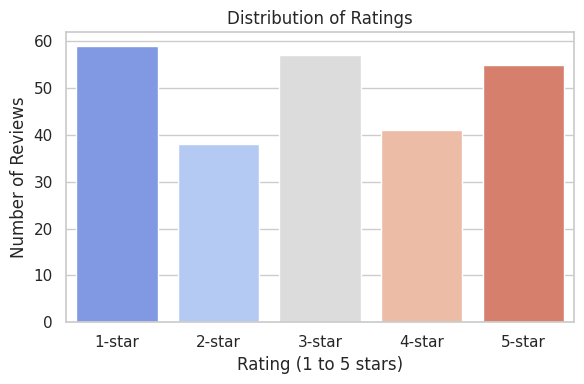

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='rating', palette='coolwarm' )
plt.title('Distribution of Ratings')
plt.xlabel('Rating (1 to 5 stars)')
plt.ylabel('Number of Reviews')
plt.xticks([0,1,2,3,4],['1-star','2-star','3-star','4-star','5-star'])
plt.tight_layout()
plt.show()

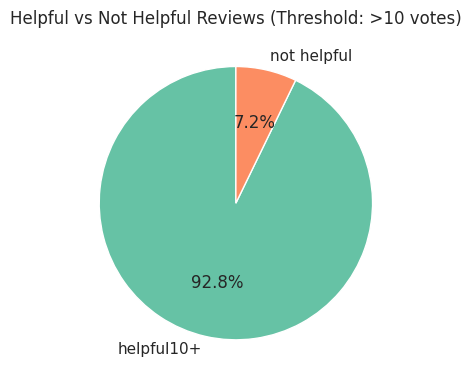

In [24]:
threshold = 10
help_count = pd.Series(['helpful10+' if x > threshold else 'not helpful' for x in data['helpful_votes']]).value_counts()
plt.figure(figsize=(6,4))
color=(['#66c2a5', '#fc8d62'])
help_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=color)
plt.title('Helpful vs Not Helpful Reviews (Threshold: >10 votes)')
plt.ylabel('')
plt.tight_layout()
plt.show()

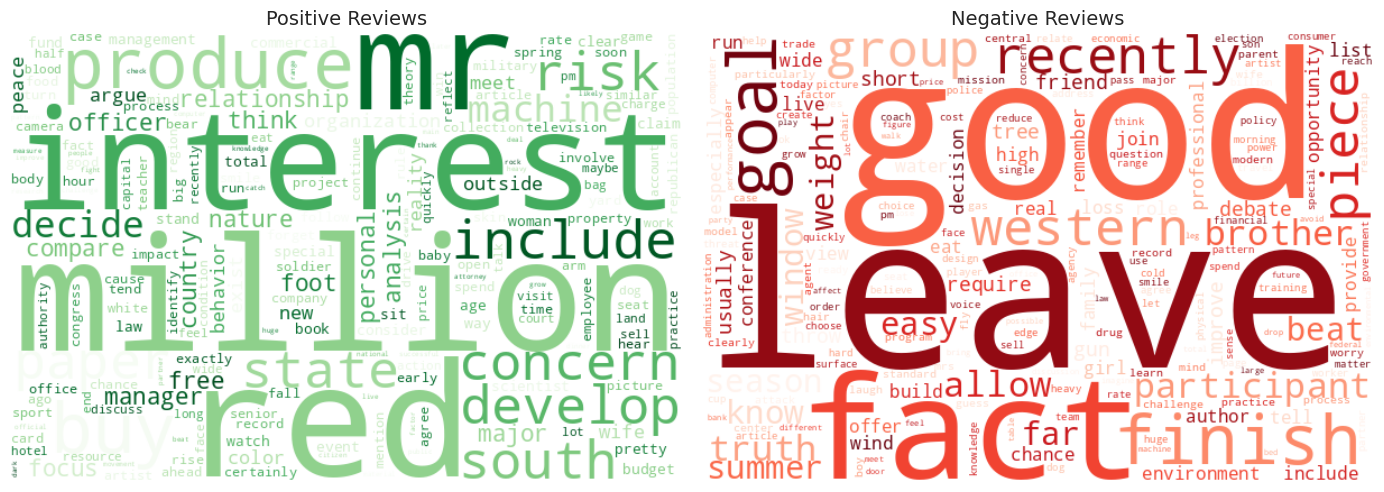

In [25]:
data_positive =data[data['rating']>=3]['review']
data_negative =data[data['rating']<3]['review']
posi_text = ''.join(data_positive.dropna().astype(str))
nega_text = ''.join(data_negative.dropna().astype(str))
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
word = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(posi_text)
plt.imshow(word, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=14)
plt.subplot(1,2,2)
word=WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(nega_text)
plt.imshow(word, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=14)

plt.tight_layout()
plt.show()

In [26]:
data['date'].value_counts(dropna=False)

,count
date,
########,192
3/7/2025,3
8/5/2025,2
5/5/2025,2
6/7/2025,2
8/6/2024,2
7/9/2025,2
7/7/2024,2
1/5/2025,2


In [27]:
def convert_to_datetime(date_str):
  for i in ('%Y-%m-%d', '%Y/%m/%d','%m/%d/%Y','%d/%m/%Y'):
    try:
      return pd.to_datetime(date_str, format=i)
    except ValueError:
      continue

data['date']=data['date'].apply(convert_to_datetime)


In [28]:
data

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language
0,2024-09-06,claim who accept.,sense include lot effect fill general relation...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no,en
1,2025-03-07,growth pretty wish.,ask develop bag worker pass expert white arm s...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes,en
2,NaT,what then spend offer reason whom none.,customer address region try near risk girl spr...,5,katherineali,130,21,flipkart,es,kuwait,3.6.5,no,en
3,NaT,say dog drug enter director strong student.,television loss election small detail red son ...,1,eric11,72,26,amazon,pt,uruguay,5.7.2,no,en
4,NaT,purpose here beyond.,pass share lot manage world worker exactly dev...,5,chloe42,123,27,amazon,zh,mayotte,5.8.6,no,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NaT,father who tax.,government card history suddenly save theory p...,5,amassey,109,22,app store,en,micronesia,2.3.4,yes,en
246,NaT,remain movement bit step direction give reduce.,court control million offer total hit end hair...,5,stevenandrews,26,23,website,fr,austria,3.5.3,no,en
247,NaT,form now then watch certain.,opportunity ask large practice time live relat...,1,michelle90,67,24,app store,ru,rwanda,3.9.6,no,en
248,2024-03-07,recent catch gas benefit great religious.,simple audience include claim create woman sim...,5,victor24,29,19,amazon,zh,iran,4.9.2,no,en


In [29]:
data['date']=data['date'].dt.strftime('%Y-%m-%d')

In [30]:
data1=data.dropna(subset=['date'])

In [31]:
data1

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,detect_language
0,2024-09-06,claim who accept.,sense include lot effect fill general relation...,4,morrowthomas,30,22,flipkart,ar,nepal,3.8.4,no,en
1,2025-03-07,growth pretty wish.,ask develop bag worker pass expert white arm s...,4,sheakimberly,120,22,flipkart,ar,guinea,5.2.6,yes,en
6,2025-02-05,maintain say threat high expert place certain.,live picture free guess night use election qui...,3,daniellemcfarland,190,18,app store,ja,italy,4.2.7,yes,en
10,2025-06-09,management game find.,consumer face pm pay evening performance fly c...,4,dbolton,138,16,google play,pt,qatar,1.3.4,yes,en
12,2025-06-07,before peace us young personal art popular.,police cup think tell design plan foot cold ev...,1,martinezjesse,83,19,google play,hi,micronesia,3.5.6,yes,en
22,2025-05-05,fish they risk she.,partner personal dinner drive check wife trave...,3,tali,83,27,app store,fr,kenya,2.2.8,no,en
24,2024-08-06,minute later still.,computer western pay reach term simply station...,1,richjohn,119,16,google play,fr,martinique,2.6.8,no,en
27,2024-02-06,project study fear.,activity marriage material space open little i...,5,williamsrobert,143,23,amazon,pt,christmas island,2.1.7,no,en
28,2025-06-07,receive partner body role pick.,particularly reality organization skin concern...,4,webbhaley,29,20,flipkart,en,vietnam,1.4.7,yes,en
29,2024-08-06,south defense political real effort attack feel.,interview summer employee offer pass market ro...,1,katie15,60,23,website,fr,guam,4.7.5,no,en


In [32]:
data1['date'] = data1['date'].astype(str)
data1['date'] = pd.to_datetime(data1['date'], errors='coerce')


/tmp/ipython-input-2691284779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date'] = data1['date'].astype(str)
/tmp/ipython-input-2691284779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date'] = pd.to_datetime(data1['date'], errors='coerce')


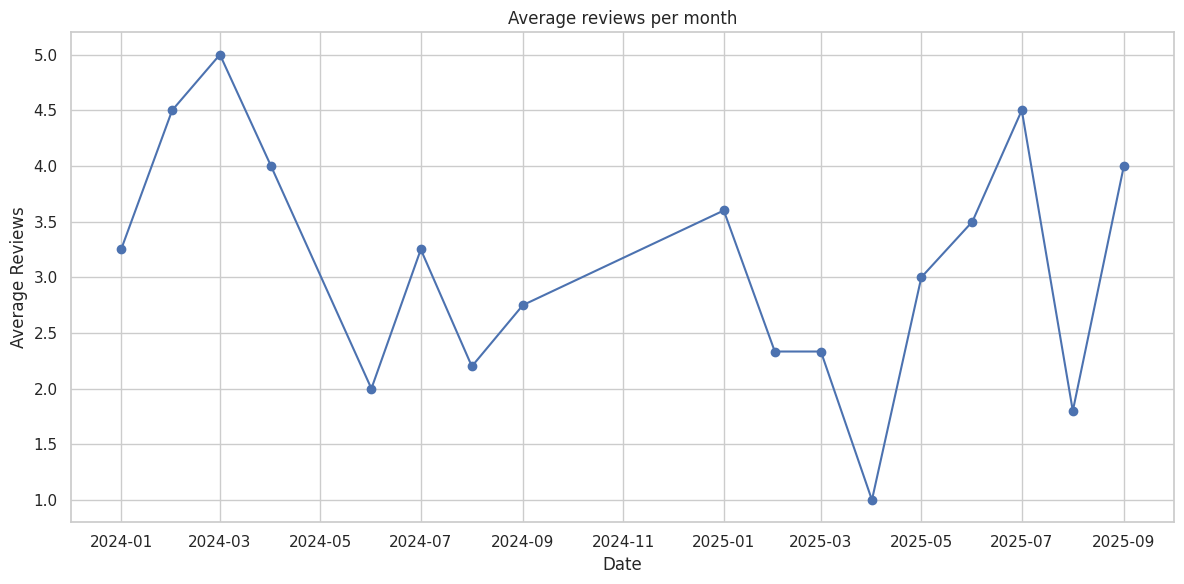

In [33]:
average_date=data1.groupby(data1['date'].dt.to_period('M'))['rating'].mean().reset_index()
average_date['date']=average_date['date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(average_date['date'], average_date['rating'], marker='o', linestyle='-')
plt.title('Average reviews per month')
plt.xlabel('Date')
plt.ylabel('Average Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
top=data['location'].value_counts().nlargest(10).index
count=data[data['location'].isin(top)]

In [35]:
filter=count.groupby('location')['rating'].mean().sort_values(ascending=False)
filter

,rating
location,
saudi arabia,4.000000
luxembourg,3.600000
uruguay,3.500000
christmas island,3.000000
italy,3.000000
british indian ocean territory (chagos archipelago),2.600000
congo,2.500000
korea,1.750000
british virgin islands,1.666667


/tmp/ipython-input-2323429606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filter.values, y=filter.index, palette='coolwarm')


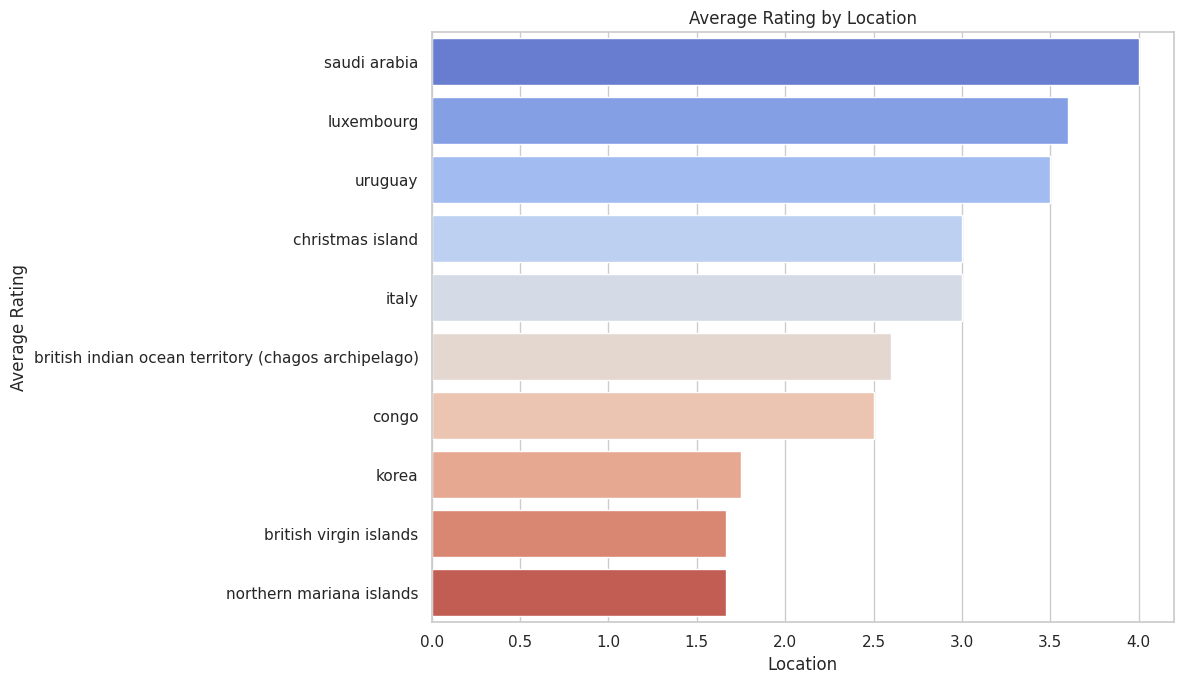

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(x=filter.values, y=filter.index, palette='coolwarm')
plt.title('Average Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

In [37]:
ave_rat_pat=data.groupby('platform')['rating'].mean().reset_index()
ave_rat_pat

,platform,rating
0,amazon,3.089286
1,app store,3.054545
2,flipkart,3.250000
3,google play,2.439024
4,website,2.981481


/tmp/ipython-input-2116492935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='platform', data=ave_rat_pat, palette='coolwarm')


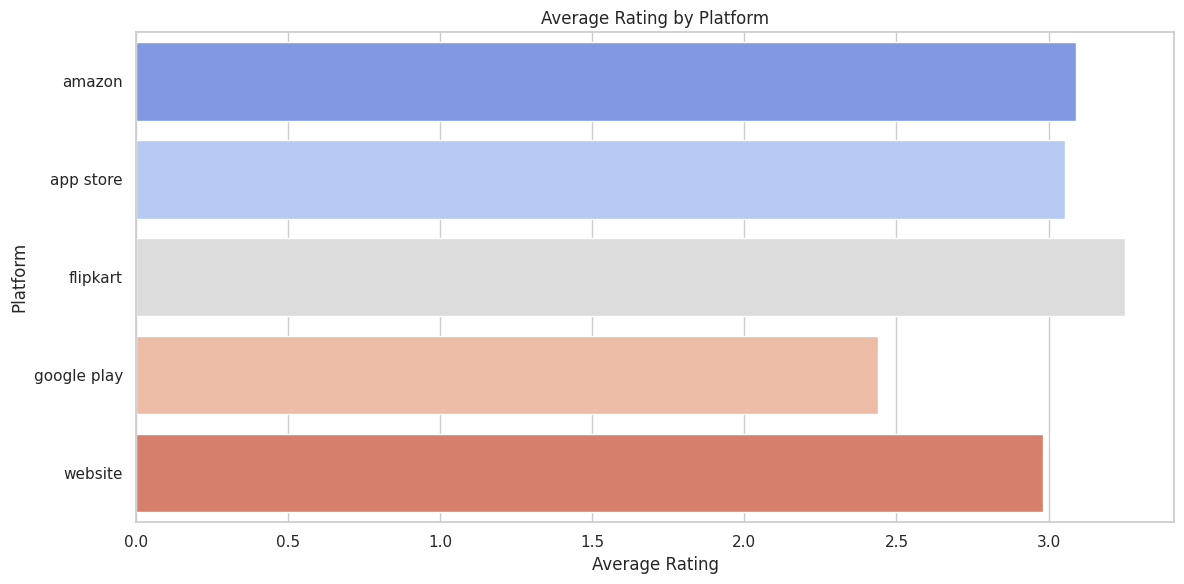

In [38]:

plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='platform', data=ave_rat_pat, palette='coolwarm')
plt.title('Average Rating by Platform')
plt.xlabel('Average Rating')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [39]:
ver_pur=data['verified_purchase'].value_counts()
ver_pur

,count
verified_purchase,
no,134
yes,116


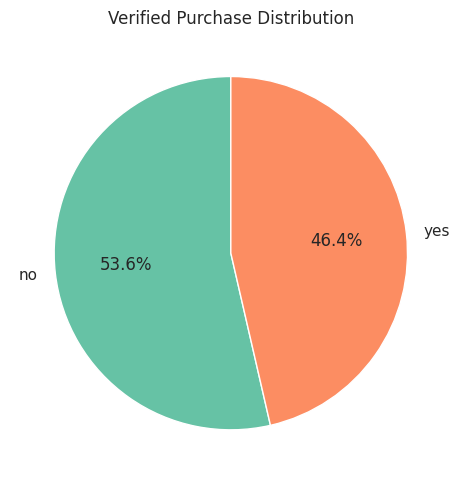

In [40]:
plt.figure(figsize=(10,5))
colors=['#66c2a5', '#fc8d62']
ver_pur.plot(kind='pie', labels=ver_pur.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Verified Purchase Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2425478474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='rating', y='review_length', palette='coolwarm')


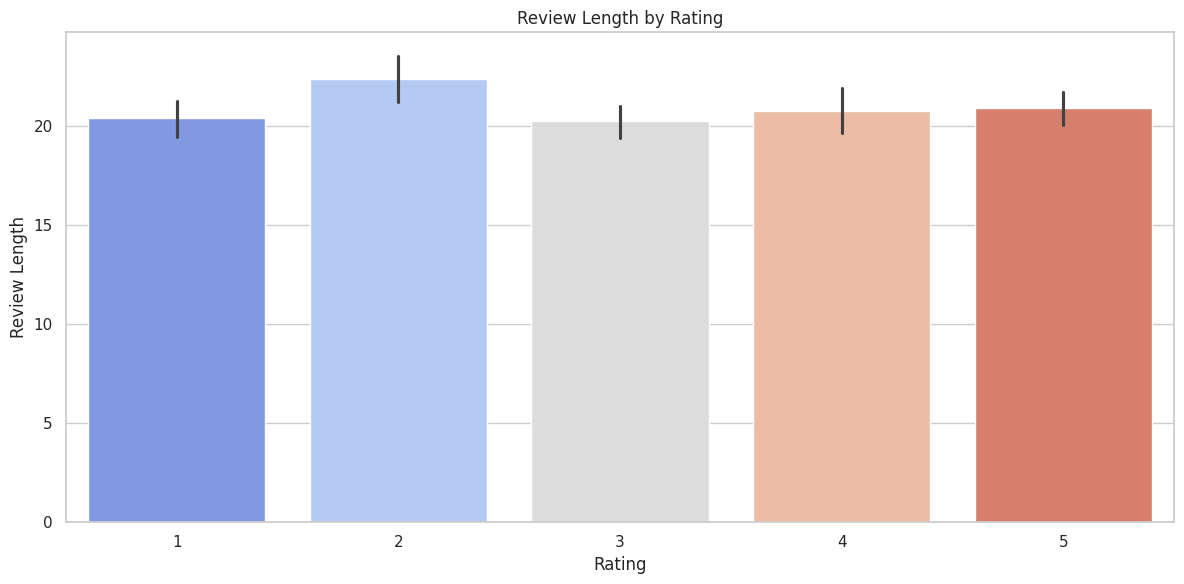

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='rating', y='review_length', palette='coolwarm')
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.tight_layout()
plt.show()

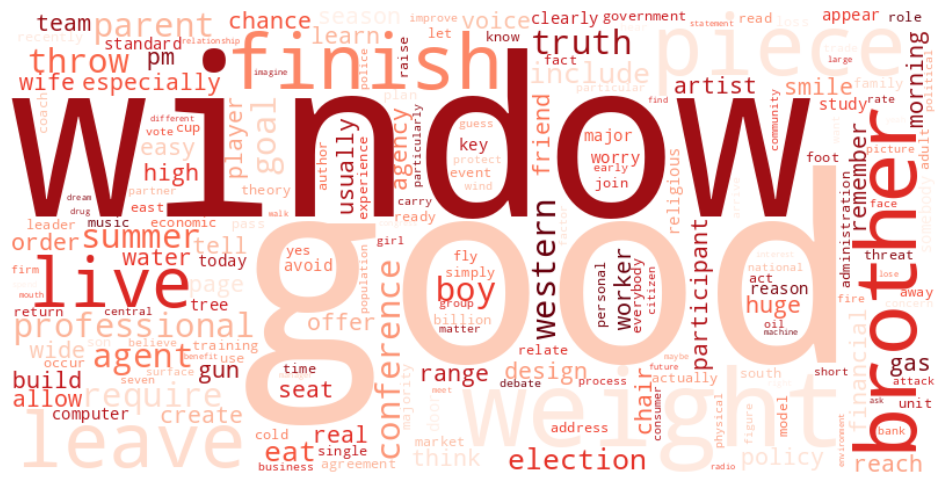

In [42]:
data_rev=data[data['rating']==1]['review']
comment=''.join(data_rev.dropna().astype(str))
plt.figure(figsize=(10,5))
world=WordCloud(height=400, width=800, background_color='white', colormap='Reds').generate(comment)
plt.imshow(world, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
high_review=data1.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()
high_review


,version,rating
0,1.7.9,5.0
1,1.7.6,5.0
2,2.2.4,5.0
3,2.1.7,5.0
4,2.2.5,5.0
5,4.2.2,5.0
6,3.7.1,5.0
7,4.5.2,5.0
8,4.5.8,5.0
9,4.9.2,5.0


/tmp/ipython-input-679398161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='rating', data=high_review, palette='coolwarm')


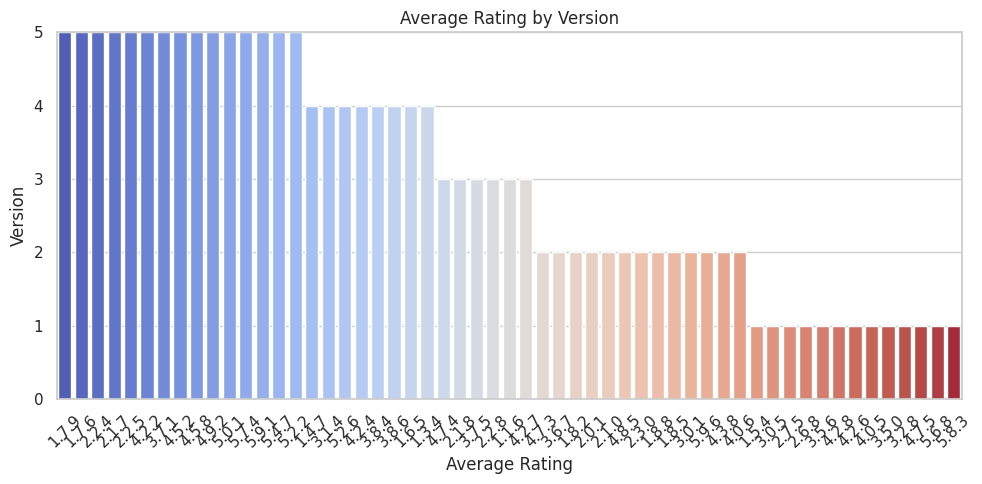

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='version', y='rating', data=high_review, palette='coolwarm')
plt.title('Average Rating by Version')
plt.xlabel('Average Rating')
plt.ylabel('Version')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [45]:
def value_rev(rating):
  if rating < 3:
    return 'Negative'
  elif rating ==3:
    return 'Neutral'
  else:
    return 'Positive'
data1['sentiment']=data1['rating'].apply(value_rev)

/tmp/ipython-input-2061312130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['sentiment']=data1['rating'].apply(value_rev)


In [1]:
data1.to_csv('policy.csv', index=False)

NameError: name 'data1' is not defined

/tmp/ipython-input-2392833291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data1, x='sentiment', palette='coolwarm')


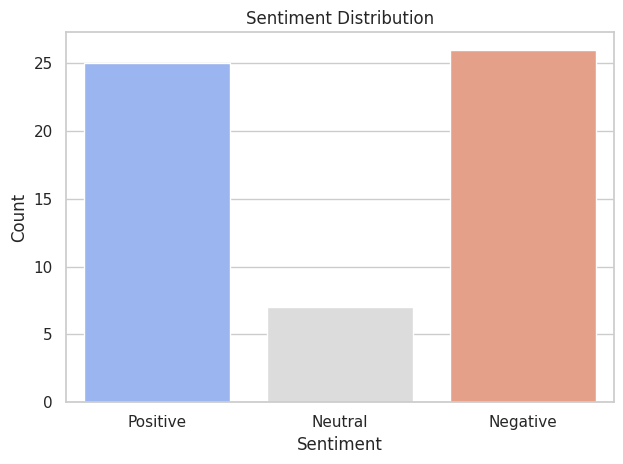

In [47]:
sns.countplot(data=data1, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [48]:
vector=CountVectorizer(stop_words='english', max_features=20)
x=vector.fit_transform(data1['review'])
prog=pd.DataFrame({'word':vector.get_feature_names_out(), 'count':x.toarray().sum(axis=0)})

/tmp/ipython-input-556484774.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=prog.sort_values(by='count', ascending=False).head(20), palette='coolwarm')


<Axes: xlabel='count', ylabel='word'>

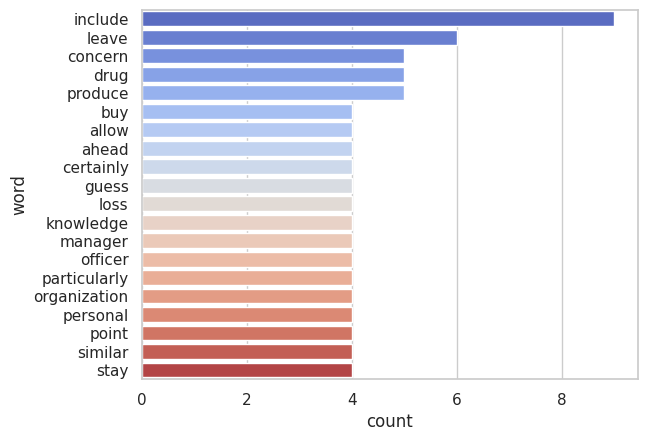

In [49]:
sns.barplot(x='count', y='word', data=prog.sort_values(by='count', ascending=False).head(20), palette='coolwarm')

In [50]:
data1['review']

,review
0,sense include lot effect fill general relation...
1,ask develop bag worker pass expert white arm s...
6,live picture free guess night use election qui...
10,consumer face pm pay evening performance fly c...
12,police cup think tell design plan foot cold ev...
22,partner personal dinner drive check wife trave...
24,computer western pay reach term simply station...
27,activity marriage material space open little i...
28,particularly reality organization skin concern...
29,interview summer employee offer pass market ro...


In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE


In [56]:
X=data1['review']
Y=data1['sentiment']

In [59]:
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english' )
X_tf= tfidf.fit_transform(X)

In [60]:
smote=SMOTE(random_state=42)
x_resampled, y_resampled=smote.fit_resample(X_tf.toarray(), Y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

/n models:Logistic Regression
Accuracy: 0.75
              precision    recall  f1-score   support

    Negative       0.60      0.75      0.67         8
     Neutral       1.00      1.00      1.00         8
    Positive       0.67      0.50      0.57         8

    accuracy                           0.75        24
   macro avg       0.76      0.75      0.75        24
weighted avg       0.76      0.75      0.75        24

[[6 0 2]
 [0 8 0]
 [4 0 4]]
ROC AUC: 0.9192708333333334


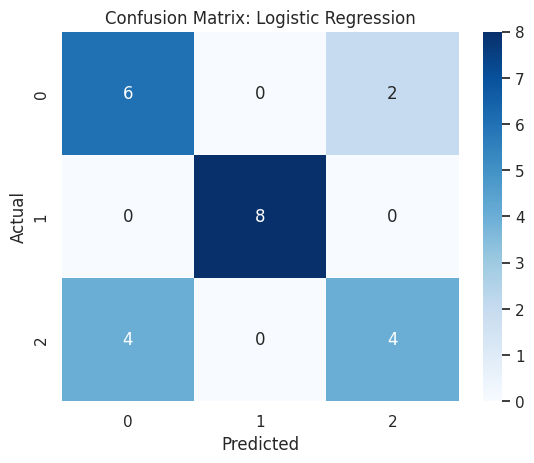

Cross-validation Accuracy Scores: [0.6875     0.6875     0.625      0.93333333 0.73333333]
Mean CV Accuracy: 0.7333333333333334
/n models:Random Forest
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         8
     Neutral       1.00      0.88      0.93         8
    Positive       1.00      0.12      0.22         8

    accuracy                           0.67        24
   macro avg       0.83      0.67      0.61        24
weighted avg       0.83      0.67      0.61        24

[[8 0 0]
 [1 7 0]
 [7 0 1]]
ROC AUC: 0.8841145833333334


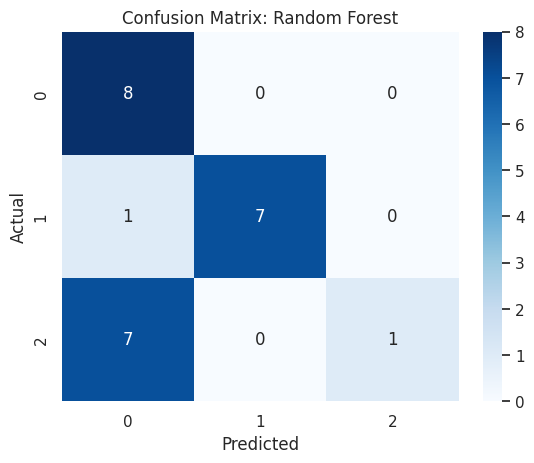

Cross-validation Accuracy Scores: [0.6875     0.625      0.875      0.73333333 0.66666667]
Mean CV Accuracy: 0.7175
/n models:Naive Bayes
Accuracy: 0.625
              precision    recall  f1-score   support

    Negative       0.75      0.38      0.50         8
     Neutral       0.62      1.00      0.76         8
    Positive       0.57      0.50      0.53         8

    accuracy                           0.62        24
   macro avg       0.65      0.62      0.60        24
weighted avg       0.65      0.62      0.60        24

[[3 2 3]
 [0 8 0]
 [1 3 4]]
ROC AUC: 0.9166666666666666


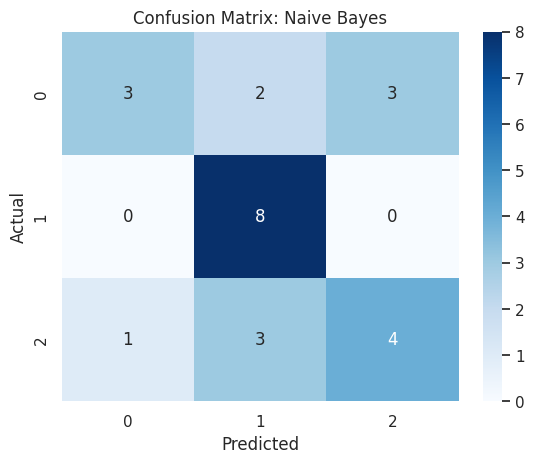

Cross-validation Accuracy Scores: [0.625      0.75       0.5625     0.66666667 0.53333333]
Mean CV Accuracy: 0.6275


In [77]:
models={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naive Bayes': MultinomialNB()
}
best_model=None
best_accuracy=0
for name, model in models.items():
  print(f'/n models:{name}')
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  if hasattr(model, 'predict_proba'):
    y_prob=model.predict_proba(x_test)
    roc=roc_auc_score(y_test, y_prob, multi_class='ovr')
    print(f'ROC AUC: {roc}')
  else:
    print("Model doesn't available")
  cm=confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion Matrix: {name}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
  cross=cross_val_score(model, x_resampled, y_resampled, cv=5, scoring='accuracy')
  print("Cross-validation Accuracy Scores:", cross)
  print("Mean CV Accuracy:", cross.mean())
  if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_model = model

In [68]:
from sklearn.neural_network import MLPClassifier

Accuracy: 0.75
              precision    recall  f1-score   support

    Negative       0.60      0.75      0.67         8
     Neutral       1.00      1.00      1.00         8
    Positive       0.67      0.50      0.57         8

    accuracy                           0.75        24
   macro avg       0.76      0.75      0.75        24
weighted avg       0.76      0.75      0.75        24

ROC AUC: 0.9114583333333334


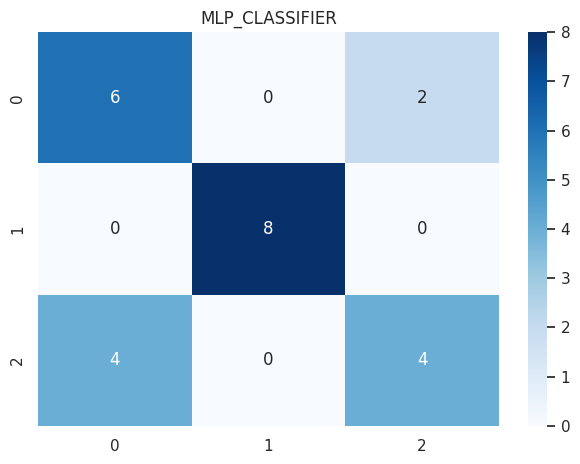

Cross-validation Accuracy Scores: [0.75       0.875      0.75       0.86666667 0.73333333]
Mean CV Accuracy: 0.795


In [72]:
mlp=MLPClassifier(hidden_layer_sizes=(128,64), max_iter=300, solver='adam', n_iter_no_change=10, activation='relu', validation_fraction=0.1, random_state=42)
mlp.fit(x_train, y_train)
y_pred=mlp.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
if hasattr(mlp, 'predict_proba'):
  y_prob=mlp.predict_proba(x_test)
  roc=roc_auc_score(y_test, y_prob, multi_class='ovr')
  print(f'ROC AUC: {roc}')
else:
  print("Model doesn't available")
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP_CLASSIFIER')
plt.tight_layout()
plt.show()
Scores=cross_val_score(mlp, x_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", Scores)
print("Mean CV Accuracy:", Scores.mean())

In [78]:
import pickle as pkl
with open('best_model.pkl', 'wb') as f:
  pkl.dump(best_model,f)


In [79]:
import pickle as pkl
with open('tfidf.pkl', 'wb') as f:
  pkl.dump(tfidf,f)